In [1]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import PyImbalReg as pir
import pandas as pd
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
import resreg
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, f1_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from joblib import dump


In [2]:
test_data = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/test_data.csv")

In [3]:
test_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'NE ID', 'endTime', 'access_success_rate',
       'resource_utilition_rate', 'TA', 'bler', 'cqi', 'mcs', 'data_rate',
       'access_success_rate_rol_mean', 'access_success_rate_rol_std',
       'access_success_rate_rol_diff', 'access_success_rate_rol_kurt',
       'access_success_rate_rol_skew', 'resource_utilition_rate_rol_mean',
       'resource_utilition_rate_rol_std', 'resource_utilition_rate_rol_diff',
       'resource_utilition_rate_rol_kurt', 'resource_utilition_rate_rol_skew',
       'TA_rol_mean', 'TA_rol_std', 'TA_rol_diff', 'TA_rol_kurt',
       'TA_rol_skew', 'bler_rol_mean', 'bler_rol_std', 'bler_rol_diff',
       'bler_rol_kurt', 'bler_rol_skew', 'cqi_rol_mean', 'cqi_rol_std',
       'cqi_rol_diff', 'cqi_rol_kurt', 'cqi_rol_skew', 'mcs_rol_mean',
       'mcs_rol_std', 'mcs_rol_diff', 'mcs_rol_kurt', 'mcs_rol_skew',
       'data_rate_rol_mean', 'data_rate_rol_std', 'data_rate_rol_diff',
       'data_rate_rol_kurt', 'data_rate_rol_skew'

In [4]:
X_test = test_data.drop(columns=['Unnamed: 0','Unnamed: 0.1','NE ID','endTime', 'relation','fault_duration','bin','fault','is_fault']).values
y_test_fd = test_data.fault_duration.values
y_test = test_data.fault.values


In [5]:
def processData(train_data):

    y = train_data.fault.values
    X = train_data.drop(columns=['fault','fault_duration']).values

    return X,y 

In [6]:
def show_results(y_test, predictions):
  print('Accuracy score:', accuracy_score(y_test, predictions))
  # print('f1 score:', f1_score(y_test, predictions))
  # print('recall score:', recall_score(y_test, predictions))

  font = {'family' : 'serif', 'weight' : 'bold', 'size':18}
  plt.rc('font', **font)
  disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions), display_labels=None)
  disp.plot()
  plt.show()

In [7]:
ada_enn_df = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/datasets/ada_EditedNearestNeighbours()_df.csv")
ada_enn_df = ada_enn_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [9]:
smote_df = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/datasets/smote_df.csv")
smote_df = smote_df.drop(columns="Unnamed: 0")
smote_df

,access_success_rate,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,access_success_rate_rol_mean,access_success_rate_rol_std,access_success_rate_rol_diff,...,mcs_rol_diff,mcs_rol_kurt,mcs_rol_skew,data_rate_rol_mean,data_rate_rol_std,data_rate_rol_diff,data_rate_rol_kurt,data_rate_rol_skew,fault_duration,fault
0,0.999779,0.388047,0.142566,0.106008,0.555099,0.484919,0.032217,0.999668,0.000425,0.499889,...,0.525678,0.323004,0.574805,0.037732,0.026155,0.555487,0.886767,0.821136,0.0,0.0
1,1.000000,0.034592,0.203608,0.100414,0.433851,0.300985,0.009966,1.000000,0.000000,0.500000,...,0.509053,0.386809,0.380141,0.034112,0.007319,0.546355,0.886511,0.754010,0.0,0.0
2,0.000000,0.007937,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,1.000000,0.500000,...,0.447921,0.022819,0.623216,0.146496,0.172152,0.546215,0.884479,0.634214,0.0,0.0
3,1.000000,0.040917,0.162222,0.054080,0.502786,0.120077,0.023226,0.994020,0.016310,0.500000,...,0.442738,0.265439,0.317896,0.043544,0.012023,0.550485,0.886045,0.559288,0.0,0.0
4,0.969697,0.083489,0.189202,0.085918,0.479716,0.427207,0.040978,0.990045,0.022077,0.484848,...,0.606440,0.465821,0.442390,0.064665,0.025504,0.563035,0.886643,0.731620,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876474,0.991181,0.159462,0.372508,0.120774,0.407742,0.253021,0.012702,0.990933,0.005772,0.499770,...,0.506378,0.052658,0.476870,0.031090,0.004845,0.547317,0.885866,0.350631,3600.0,2.0
1876475,0.999640,0.108630,0.187365,0.092799,0.702921,0.352129,0.101006,0.798155,0.814672,0.499820,...,0.446409,0.795255,0.112411,0.253623,0.172660,0.506933,0.886499,0.570681,3600.0,2.0
1876476,0.999885,0.125447,0.168327,0.104145,0.479967,0.342189,0.015713,0.999911,0.000112,0.499942,...,0.480183,0.423302,0.374254,0.093476,0.043817,0.546631,0.884904,0.501397,3600.0,2.0
1876477,0.998968,0.660762,0.187102,0.123032,0.422151,0.254815,0.009800,0.998955,0.001440,0.500366,...,0.485246,0.469409,0.349228,0.048887,0.016928,0.544534,0.885164,0.541523,674.0,2.0


In [9]:
def train_model(target_df):
    X , y = processData(target_df)
    
    params = {'n_estimators': 100 , 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 1}
    rf = RandomForestClassifier()
    rf.fit(X , y)

    feat_imps = rf.feature_importances_
    most_important = ada_enn_df.drop(columns=['fault','fault_duration']).columns[np.where(feat_imps > np.mean(feat_imps))]

    print(most_important)


    X_most = X[:, np.where(feat_imps > np.mean(feat_imps))]
    X_most = X_most.reshape((X_most.shape[0], X_most.shape[2]))
    X_test_most = X_test[:, np.where(feat_imps > np.mean(feat_imps))]
    X_test_most = X_test_most.reshape((X_test_most.shape[0], X_test_most.shape[2]))


    rf_most = RandomForestClassifier(**params)
    rf_most.fit(X_most, target_df.fault.values)
    rf_most_pred = rf_most.predict(X_test_most)
    show_results(y_test, rf_most_pred)

Index(['resource_utilition_rate', 'TA', 'cqi', 'access_success_rate_rol_mean',
       'access_success_rate_rol_std', 'access_success_rate_rol_kurt',
       'access_success_rate_rol_skew', 'resource_utilition_rate_rol_mean',
       'resource_utilition_rate_rol_std', 'TA_rol_mean', 'TA_rol_std',
       'bler_rol_mean', 'bler_rol_std', 'cqi_rol_mean', 'cqi_rol_std',
       'mcs_rol_mean', 'data_rate_rol_mean'],
      dtype='object')
Accuracy score: 0.9309413533099512


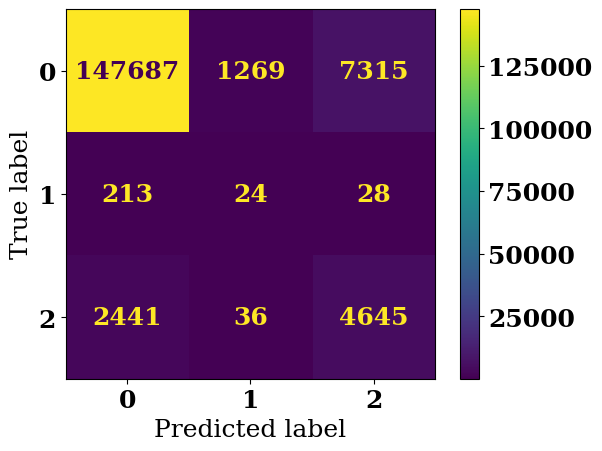

In [14]:
train_model(smote_df)

Accuracy score: 0.9355301910080778


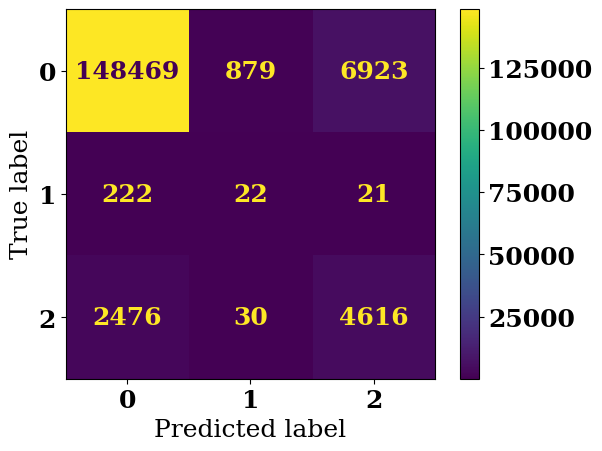

In [10]:
most_important = ['resource_utilition_rate', 'TA', 'cqi', 'access_success_rate_rol_mean',
       'access_success_rate_rol_std', 'access_success_rate_rol_kurt',
       'access_success_rate_rol_skew', 'resource_utilition_rate_rol_mean',
       'resource_utilition_rate_rol_std', 'TA_rol_mean', 'TA_rol_std',
       'bler_rol_mean', 'bler_rol_std', 'cqi_rol_mean', 'cqi_rol_std',
       'mcs_rol_mean', 'data_rate_rol_mean']

params = {'n_estimators': 191, 'max_depth': 32, 'min_samples_split': 10, 'min_samples_leaf': 1}

X_most = smote_df[most_important]
y_most = smote_df.fault.values

X_test_most = test_data[most_important]


rf_most = RandomForestClassifier(**params)
rf_most.fit(X_most, y_most)
rf_most_pred = rf_most.predict(X_test_most)
show_results(y_test, rf_most_pred)

Index(['resource_utilition_rate', 'TA', 'access_success_rate_rol_mean',
       'access_success_rate_rol_std', 'access_success_rate_rol_diff',
       'resource_utilition_rate_rol_mean', 'resource_utilition_rate_rol_diff',
       'resource_utilition_rate_rol_kurt', 'TA_rol_mean', 'TA_rol_std',
       'bler_rol_mean', 'cqi_rol_std', 'mcs_rol_std', 'mcs_rol_diff',
       'data_rate_rol_mean', 'data_rate_rol_skew'],
      dtype='object')
Accuracy score: 0.9603380219726503


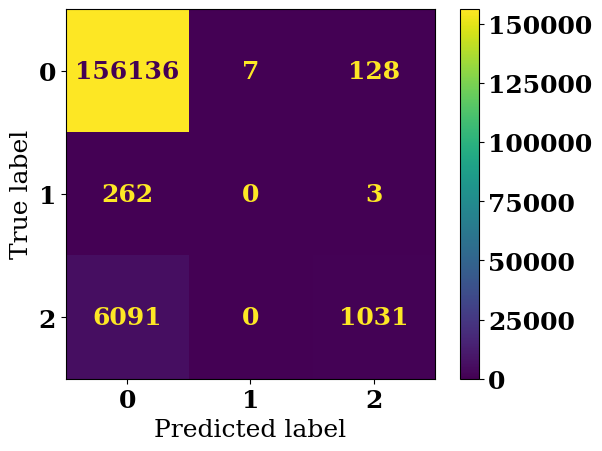

In [15]:
train_model(ada_enn_df)

Index(['resource_utilition_rate', 'TA', 'cqi', 'access_success_rate_rol_mean',
       'resource_utilition_rate_rol_mean', 'resource_utilition_rate_rol_diff',
       'resource_utilition_rate_rol_kurt', 'TA_rol_mean', 'TA_rol_std',
       'bler_rol_mean', 'cqi_rol_std', 'mcs_rol_std', 'mcs_rol_diff',
       'data_rate_rol_skew'],
      dtype='object')
Accuracy score: 0.9608512874408828


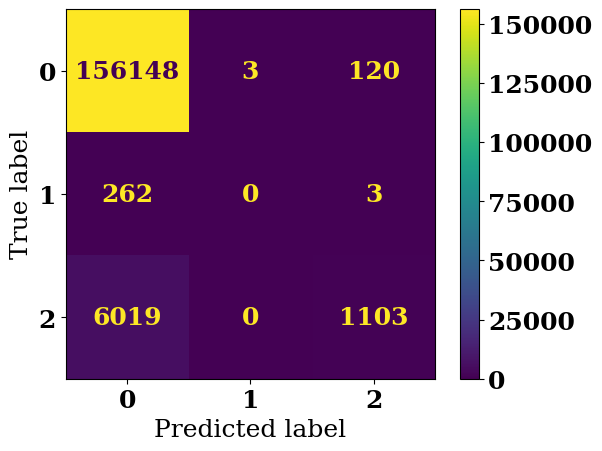

In [9]:
ada_tl_df = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/datasets/ada_TomekLinks()_df.csv")
ada_tl_df = ada_tl_df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
train_model(ada_tl_df)

Index(['resource_utilition_rate', 'TA', 'access_success_rate_rol_mean',
       'resource_utilition_rate_rol_mean', 'resource_utilition_rate_rol_diff',
       'resource_utilition_rate_rol_kurt', 'TA_rol_mean', 'TA_rol_std',
       'bler_rol_mean', 'cqi_rol_std', 'mcs_rol_std', 'mcs_rol_diff',
       'data_rate_rol_mean', 'data_rate_rol_skew'],
      dtype='object')
Accuracy score: 0.960179154089626


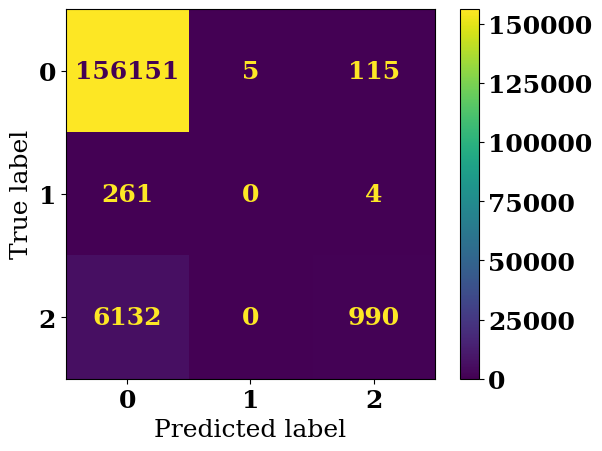

In [11]:
ada_rus_df = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/datasets/ada_RandomUnderSampler(random_state=42)_df.csv")
ada_rus_df = ada_rus_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
train_model(ada_rus_df)

Index(['resource_utilition_rate', 'TA', 'access_success_rate_rol_mean',
       'resource_utilition_rate_rol_mean', 'resource_utilition_rate_rol_diff',
       'resource_utilition_rate_rol_kurt', 'TA_rol_mean', 'TA_rol_std',
       'bler_rol_mean', 'cqi_rol_std', 'mcs_rol_std', 'mcs_rol_diff',
       'data_rate_rol_mean', 'data_rate_rol_skew'],
      dtype='object')
Accuracy score: 0.9602769189407179


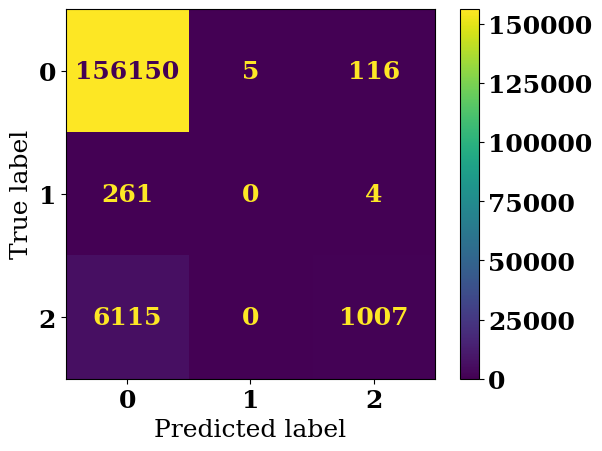

In [17]:
BDS_df = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/datasets/borderlinesmote_df.csv")
BDS_df = BDS_df.drop(columns=['Unnamed: 0'])
train_model(BDS_df)

Index(['resource_utilition_rate', 'TA', 'access_success_rate_rol_mean',
       'access_success_rate_rol_std', 'resource_utilition_rate_rol_mean',
       'resource_utilition_rate_rol_diff', 'resource_utilition_rate_rol_kurt',
       'TA_rol_mean', 'TA_rol_std', 'bler_rol_mean', 'cqi_rol_std',
       'mcs_rol_std', 'mcs_rol_diff', 'data_rate_rol_mean',
       'data_rate_rol_skew'],
      dtype='object')
Accuracy score: 0.9602097056055922


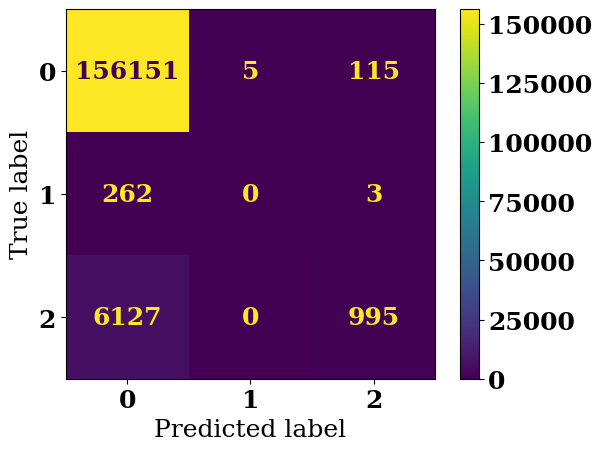

In [10]:
BDS_ENN_df = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/datasets/borderlinesmote_EditedNearestNeighbours()_df.csv")
BDS_ENN_df = BDS_ENN_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
train_model(BDS_ENN_df)

In [11]:
BDS_RUS_df = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/datasets/borderlinesmote_RandomUnderSampler(random_state=42)_df.csv")
BDS_RUS_df = BDS_RUS_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
train_model(BDS_RUS_df)

Index(['resource_utilition_rate', 'TA', 'cqi', 'access_success_rate_rol_mean',
       'access_success_rate_rol_std', 'resource_utilition_rate_rol_mean',
       'resource_utilition_rate_rol_diff', 'resource_utilition_rate_rol_kurt',
       'TA_rol_mean', 'TA_rol_std', 'bler_rol_mean', 'cqi_rol_std',
       'mcs_rol_std', 'mcs_rol_diff', 'data_rate_rol_mean',
       'data_rate_rol_skew'],
      dtype='object')


In [ ]:
BDS_TL_df = pd.read_csv("//home/usr/Documents/notebooks/oversampling/full comp/datasets/borderlinesmote_TomekLinks()_df.csv")
BDS_TL_df = BDS_TL_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
train_model(BDS_TL_df)

In [ ]:
smote_df = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/datasets/smote_df.csv")
smote_df = smote_df.drop(columns=['Unnamed: 0'])
train_model(smote_df)

In [ ]:
smote_ENN_df = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/datasets/smote_EditedNearestNeighbours()_df.csv")
smote_ENN_df = smote_ENN_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
train_model(smote_ENN_df)

In [ ]:
smote_RUS_df = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/datasets/smote_RandomUnderSampler(random_state=42)_df.csv")
smote_RUS_df = smote_RUS_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
train_model(smote_RUS_df)

In [ ]:
smote_TL_df = pd.read_csv("/home/usr/Documents/notebooks/oversampling/full comp/datasets/smote_TomekLinks()_df.csv")
smote_TL_df = smote_TL_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
train_model(smote_TL_df)